In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Mexico  = pd.read_csv('Mexico.csv')

In [3]:
# Verificamos información del dataframe
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26582 non-null  int64  
 1   last_scraped                                  26582 non-null  object 
 2   name                                          26582 non-null  object 
 3   host_id                                       26582 non-null  int64  
 4   host_name                                     26582 non-null  object 
 5   host_since                                    26582 non-null  object 
 6   host_response_time                            26582 non-null  object 
 7   host_is_superhost                             26582 non-null  object 
 8   host_identity_verified                        26582 non-null  object 
 9   neighbourhood                                 26582 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Mexico['review_scores_cleanliness'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: review_scores_cleanliness
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Mexico['review_scores_cleanliness'].max()
Min = Mexico['review_scores_cleanliness'].min()
Limites = [Min, Max]
Limites

[3.78, 5.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

1.2200000000000002

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 26582

ni = 1 + 3.32 * np.log10(n)
ni

15.689631010177528

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

0.07775836150694763

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (3.78, 5.0, 16)
intervalos

array([3.78      , 3.86133333, 3.94266667, 4.024     , 4.10533333,
       4.18666667, 4.268     , 4.34933333, 4.43066667, 4.512     ,
       4.59333333, 4.67466667, 4.756     , 4.83733333, 4.91866667,
       5.        ])

In [10]:
# Creamos las categorías
categorias = [ "Categoria1", "Categoria2", "Categoria3", "Categoria4", "Categoria5", "Categoria6", "Categoria7", "Categoria8", "Categoria9", "Categoria10", "Categoria11", "Categoria12", "Categoria13", "Categoria14", "Categoria15" ]

In [11]:
# Creamos las ctegorias en la columna numerica
Mexico['review_scores_cleanliness'] = pd.cut ( x = Mexico ['review_scores_cleanliness'], bins = intervalos, labels = categorias )
Mexico['review_scores_cleanliness']

0        Categoria14
1        Categoria12
2        Categoria12
3        Categoria15
4        Categoria15
            ...     
26577    Categoria14
26578    Categoria14
26579    Categoria14
26580    Categoria14
26581    Categoria14
Name: review_scores_cleanliness, Length: 26582, dtype: category
Categories (15, object): ['Categoria1' < 'Categoria2' < 'Categoria3' < 'Categoria4' ... 'Categoria12' < 'Categoria13' < 'Categoria14' < 'Categoria15']

In [12]:
table1 = freq_tbl(Mexico['review_scores_cleanliness'])
table1

,review_scores_cleanliness,frequency,percentage,cumulative_perc
0,Categoria15,8253,0.310473,0.310520
1,Categoria14,7752,0.291626,0.602190
2,Categoria13,3599,0.135392,0.737603
3,Categoria12,2162,0.081333,0.818948
4,Categoria11,1571,0.059100,0.878057
5,Categoria9,836,0.031450,0.909512
6,Categoria10,786,0.029569,0.939085
7,Categoria3,423,0.015913,0.955000
8,Categoria8,398,0.014973,0.969975
9,Categoria7,356,0.013393,0.983370


In [13]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,review_scores_cleanliness,frequency
0,Categoria15,8253
1,Categoria14,7752
2,Categoria13,3599
3,Categoria12,2162
4,Categoria11,1571
5,Categoria9,836
6,Categoria10,786
7,Categoria3,423
8,Categoria8,398
9,Categoria7,356


In [14]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('review_scores_cleanliness')
Filtro_index

,frequency
review_scores_cleanliness,
Categoria15,8253
Categoria14,7752
Categoria13,3599
Categoria12,2162
Categoria11,1571
Categoria9,836
Categoria10,786
Categoria3,423
Categoria8,398


Text(0, 0.5, 'Frecuencia')

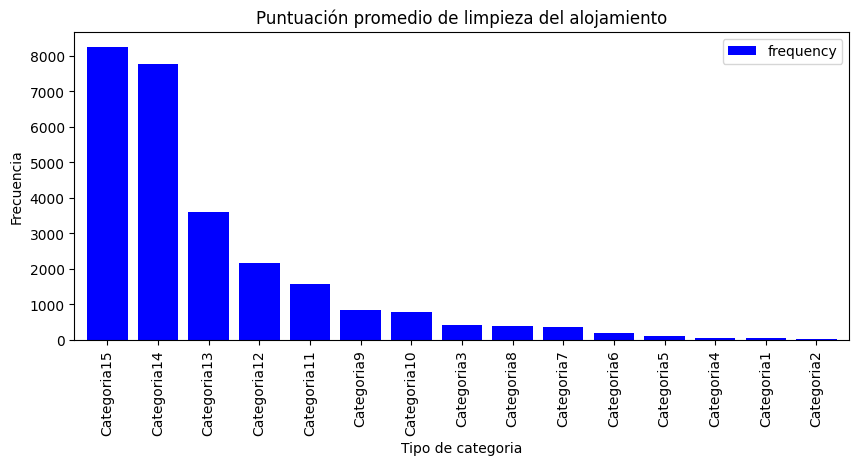

In [15]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Puntuación promedio de limpieza del alojamiento')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')